In [1]:
import pickle
import numpy as np
import collections
%matplotlib inline
import csv

import matplotlib
import matplotlib.pyplot as plt

In [2]:
f = open('newAllDocTopicProps.pckl', 'rb')
tprops = pickle.load(f)
f.close()

In [4]:
journals = ['cgt', 'ejhg', 'gt', 'gim', 'gene', 'jhg', 'ng', 'nrg', 'npjregenmed', 'onc', 'oncsis']

In [5]:
# find journalwise topic proportions
jourwiseProps = {}
for key, value in tprops.items():
    jou = key.split('_')[0]
    if jou not in jourwiseProps:
        jourwiseProps[jou] = np.zeros(len(value))
    else:
        jourwiseProps[jou] += value
        
# normalize to make probability vectors      
for key, value in jourwiseProps.items():
    jourwiseProps[key] = value/sum(value)

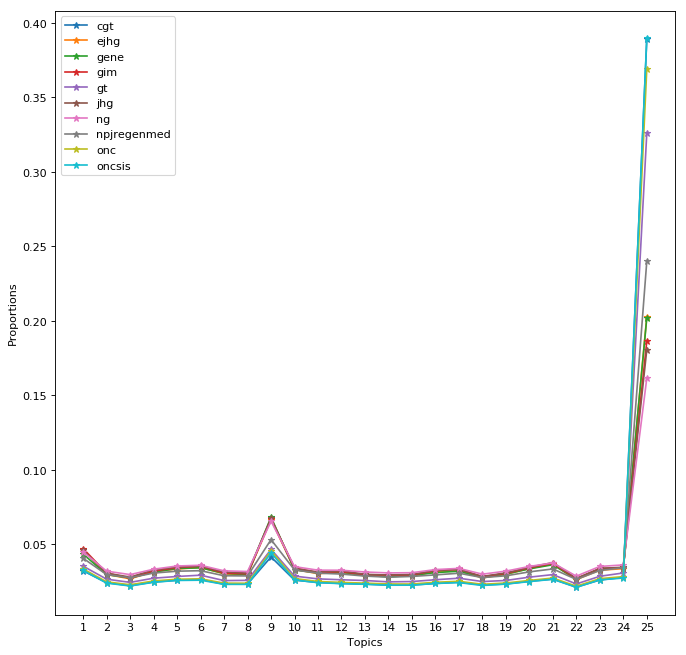

In [8]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
jourNames = []
for key, value in jourwiseProps.items():
    plt.plot(np.arange(1, len(value)+1), jourwiseProps[key], '-*')
    jourNames.append(key)

plt.legend(jourNames)
plt.xlabel('Topics')
plt.ylabel('Proportions')
plt.xticks(np.arange(1, len(value)+1))
plt.show()


In [9]:
# find yearwise topic proportions
yearwiseProps = {}
for key, value in tprops.items():
    yea = key.split('_')[2].split('-')[0]
    if yea not in yearwiseProps:
        yearwiseProps[yea] = np.zeros(len(value))
    else:
        yearwiseProps[yea] += value

yearwiseProps = collections.OrderedDict(sorted(yearwiseProps.items()))
        
# normalize to make probability vectors      
for key, value in yearwiseProps.items():
    yearwiseProps[key] = value/sum(value)
    

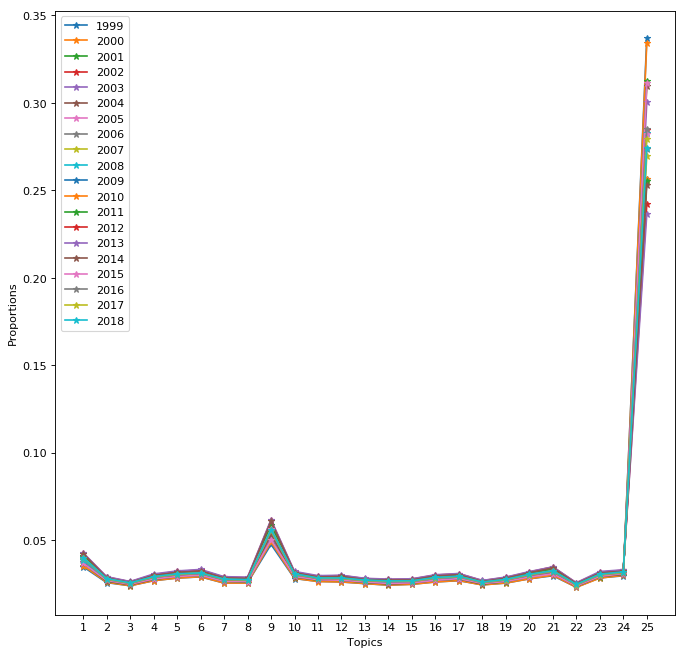

In [10]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
years = []
for key, value in yearwiseProps.items():
    plt.plot(np.arange(1, len(value)+1), yearwiseProps[key], '-*')
    years.append(key)

plt.legend(years)
plt.xlabel('Topics')
plt.ylabel('Proportions')
plt.xticks(np.arange(1, len(value)+1))
plt.show()

In [11]:
# find jourwise evolution of topic proportions by year
jourwiseYearlyProps = {}
for key, value in tprops.items():
    jou = key.split('_')[0]
    yea = key.split('_')[2].split('-')[0]
    jou_yea = '_'.join([jou, yea])
    
    if jou_yea not in jourwiseYearlyProps:
        jourwiseYearlyProps[jou_yea] = np.zeros(len(value))
    else:
        jourwiseYearlyProps[jou_yea] += value

jourwiseYearlyProps = collections.OrderedDict(sorted(jourwiseYearlyProps.items()))
        
# normalize to make probability vectors      
for key, value in jourwiseYearlyProps.items():
    jourwiseYearlyProps[key] = value/sum(value)

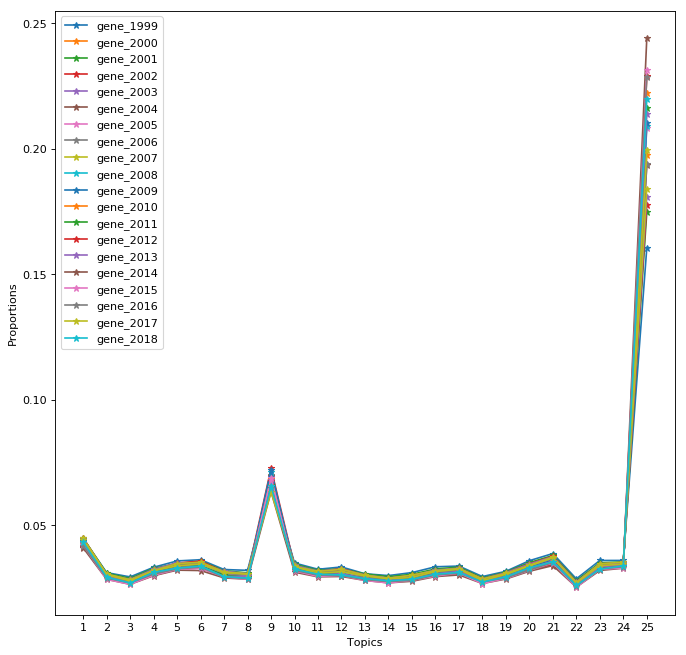

In [26]:
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
journalName = 'gene'
years = []
for key, value in jourwiseYearlyProps.items():
    if journalName in key:
        plt.plot(np.arange(1, len(value)+1), jourwiseYearlyProps[key], '-*')
        years.append(key)

plt.legend(years)
plt.xlabel('Topics')
plt.ylabel('Proportions')
plt.xticks(np.arange(1, len(value)+1))
plt.show()